In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас 
# --------------------------------------------------------- 1
df = pd.read_csv('UCI_Credit_Card.csv') #DONE

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)

In [5]:
# --------------------------------------------------------- 2.1
df.info()
df.describe()
#DONE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# --------------------------------------------------------- 2.2
df[['EDUCATION','ID']].groupby('EDUCATION').count()

,ID
EDUCATION,
0,14
1,10585
2,14030
3,4917
4,123
5,280
6,51


In [7]:
df[['SEX', 'LIMIT_BAL']].groupby('SEX').median()

,LIMIT_BAL
SEX,
1,130000.0
2,150000.0


In [8]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
# --------------------------------------------------------- 3
df[(df['SEX']==2) & (df['EDUCATION']==2)].shape[0]
#DONE

8656

In [9]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей
# начинающихся на BILL_ и PAY_
# --------------------------------------------------------- 4
df.loc[:,('BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT5','BILL_AMT6',
          'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT5','PAY_AMT6',
          'default.payment.next.month')].groupby('default.payment.next.month').median()
#TODO

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,
0,23119.5,21660.5,20202.5,17998.0,16679.0,2459.5,2247.5,2000.0,1765.0,1706.0
1,20185.0,20300.5,19834.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0


In [10]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
# --------------------------------------------------------- 5

print('1 - MALE // 2 - FEMALE')

pd.pivot_table(data=df,
               values='ID',
               index=['EDUCATION', 'SEX'],
               columns='MARRIAGE',
               aggfunc='count',
               fill_value=0) #DONE[?]

1 - MALE // 2 - FEMALE


MARRIAGE        0     1     2   3
EDUCATION SEX                    
0         1     0     2     6   0
          2     0     2     4   0
1         1     1  1690  2633  30
          2     3  2032  4176  20
2         1     1  2370  2940  63
          2     5  4472  4080  99
3         1    12  1048   894  36
          2    32  1813  1015  67
4         1     0    18    23   1
          2     0    34    45   2
5         1     0    48    46   1
          2     0   102    81   2
6         1     0    14    11   0
          2     0    14    10   2

In [11]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

# --------------------------------------------------------- 6
df2 = df.copy()
df2['LIMIT_BAL_CLASS'] = df2['LIMIT_BAL'].map(lambda a:
                                             'A' if a <= 10000 else
                                             'B' if a <= 100000 else
                                             'C' if a <= 200000 else
                                             'D' if a <= 400000 else
                                             'E' if a <= 700000 else
                                             'F')

df2.head()
#DONE

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,LIMIT_BAL_CLASS
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,B
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,B


In [12]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

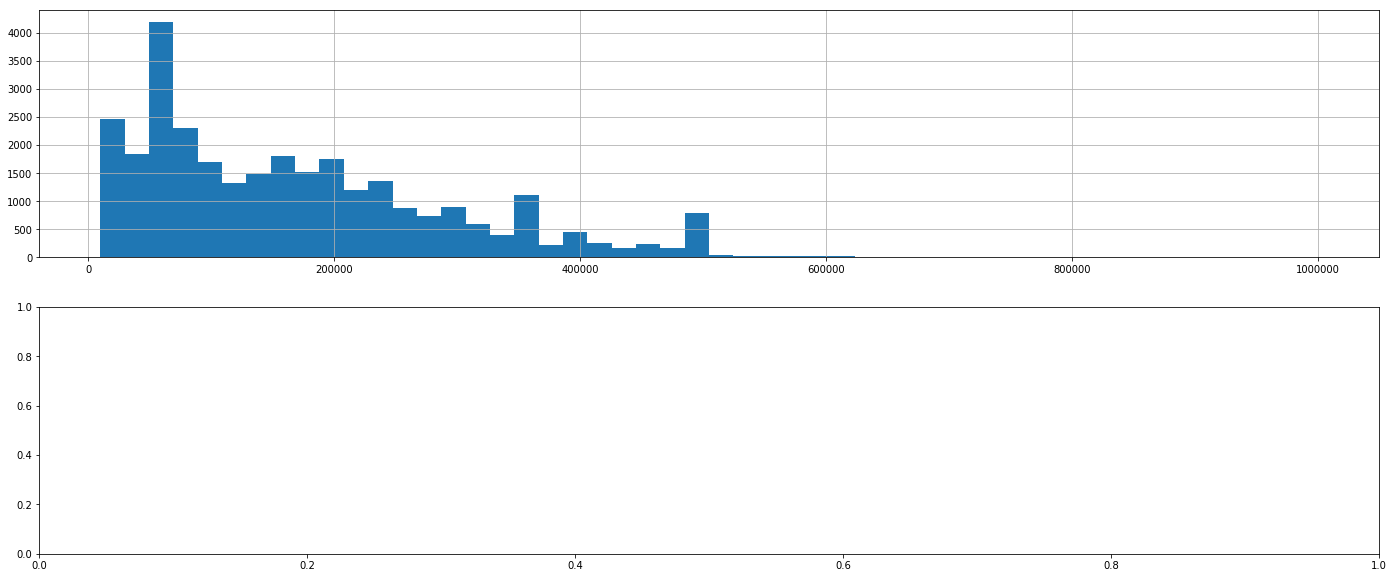

In [13]:
# --------------------------------------------------------- 7
_, ax = plt.subplots(2, 1, figsize=(24,10))

# ------------------------------------------------------------ hist
df2['LIMIT_BAL'].hist(bins=50, ax=ax[0])
#df2['LIMIT_BAL_CLASS'].hist(ax=ax[1]) # -----------------------------------------[??] -- can't plot this

# ------------------------------------------------------------ pivot table
# df2.pivot_table(
#     values='ID',
#     index='LIMIT_BAL',
#     aggfunc='count'
# ).plot(
#     kind='bar', ax=ax[0]
# )

# df2.pivot_table(
#     values='ID',
#     index='LIMIT_BAL_CLASS',
#     aggfunc='count'
# ).plot(
#     kind='bar', ax=ax[1]
# )

# ------------------------------------------------------------ sns form
# sns.factorplot('LIMIT_BAL', data=df2, kind='count', ax=ax[0]) #-----------------[??] -- axes after plot?
# sns.factorplot('LIMIT_BAL_CLASS', data=df2, kind='count', ax=ax[1]) #-----------[??] -- unsorted? axes after plot?

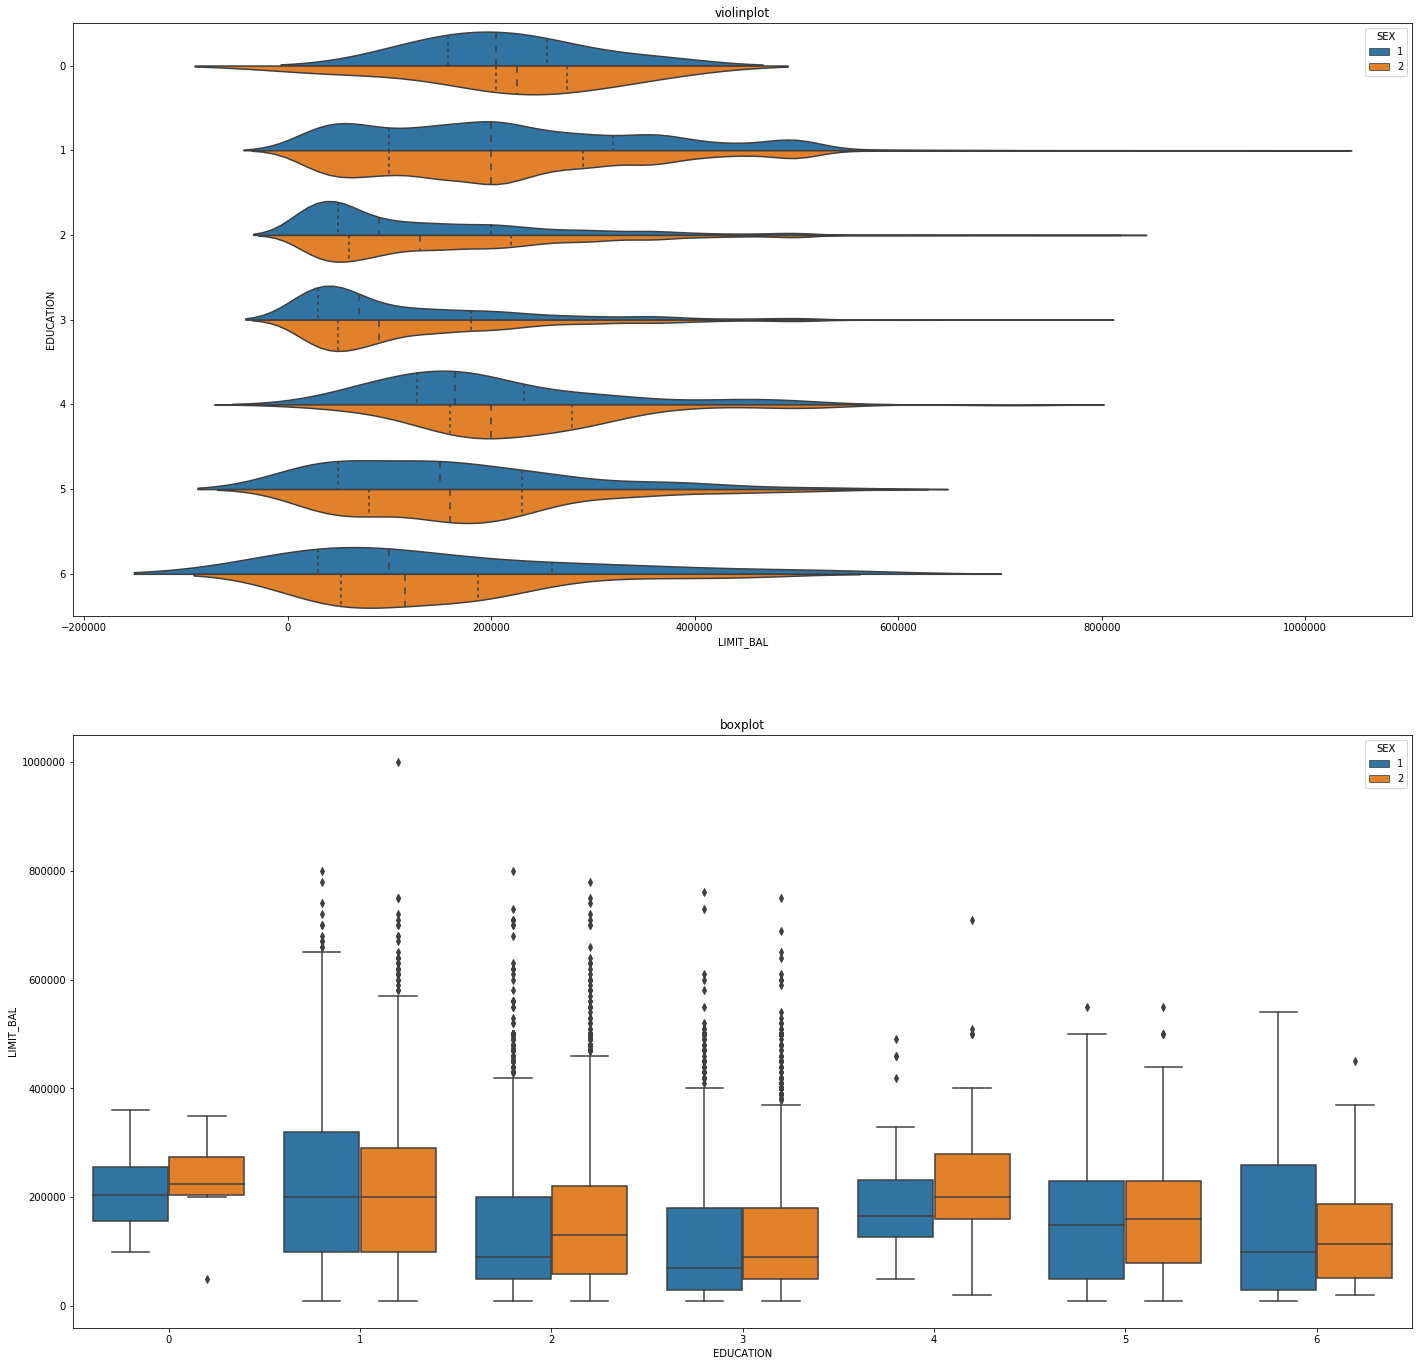

In [14]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)

# --------------------------------------------------------- 8
fig = plt.figure(figsize=(24,24))

ax = plt.subplot(2, 1, 1)
ax.title.set_text('violinplot')
sns.violinplot(data=df,
               x='LIMIT_BAL',
               y='EDUCATION',
               hue='SEX',
               split=True,
               inner="quartile",
               orient='h'
              )

ax = plt.subplot(2, 1, 2)
ax.title.set_text('boxplot')
sns.boxplot(data=df,
            x='EDUCATION',
            y='LIMIT_BAL',
            hue='SEX'
           )

#DONE

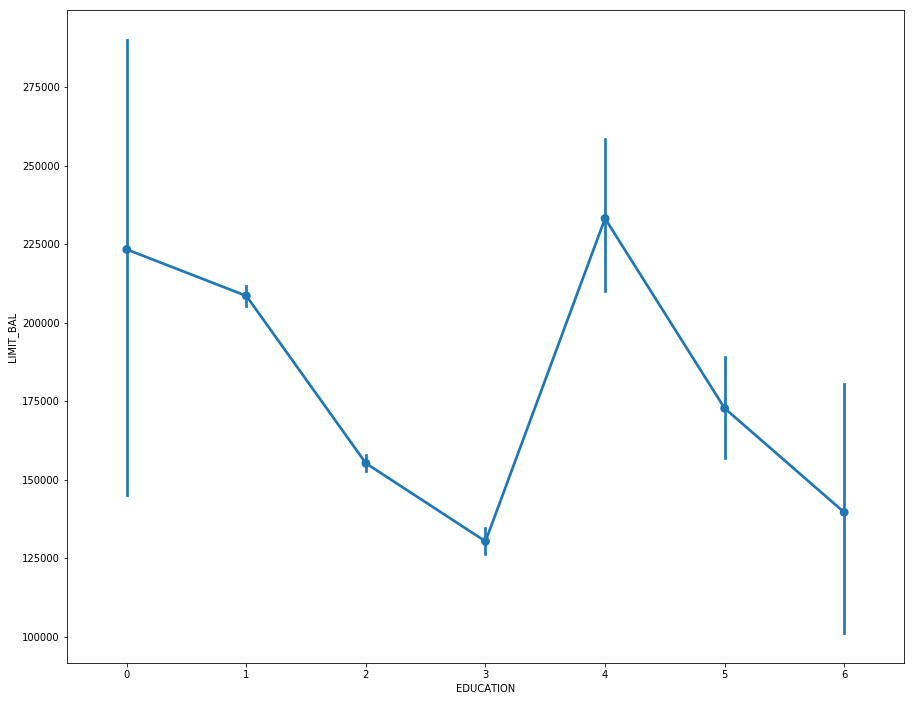

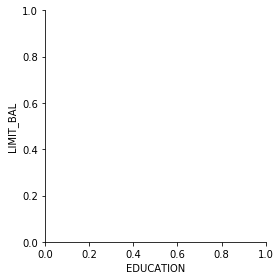

In [15]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов
_, ax = plt.subplots(1, 1, figsize=(15,12))
sns.factorplot(y="LIMIT_BAL", x="EDUCATION", data=df[df['SEX']==2], ax=ax) # ?? --- axes after axes?
#DONE[??]

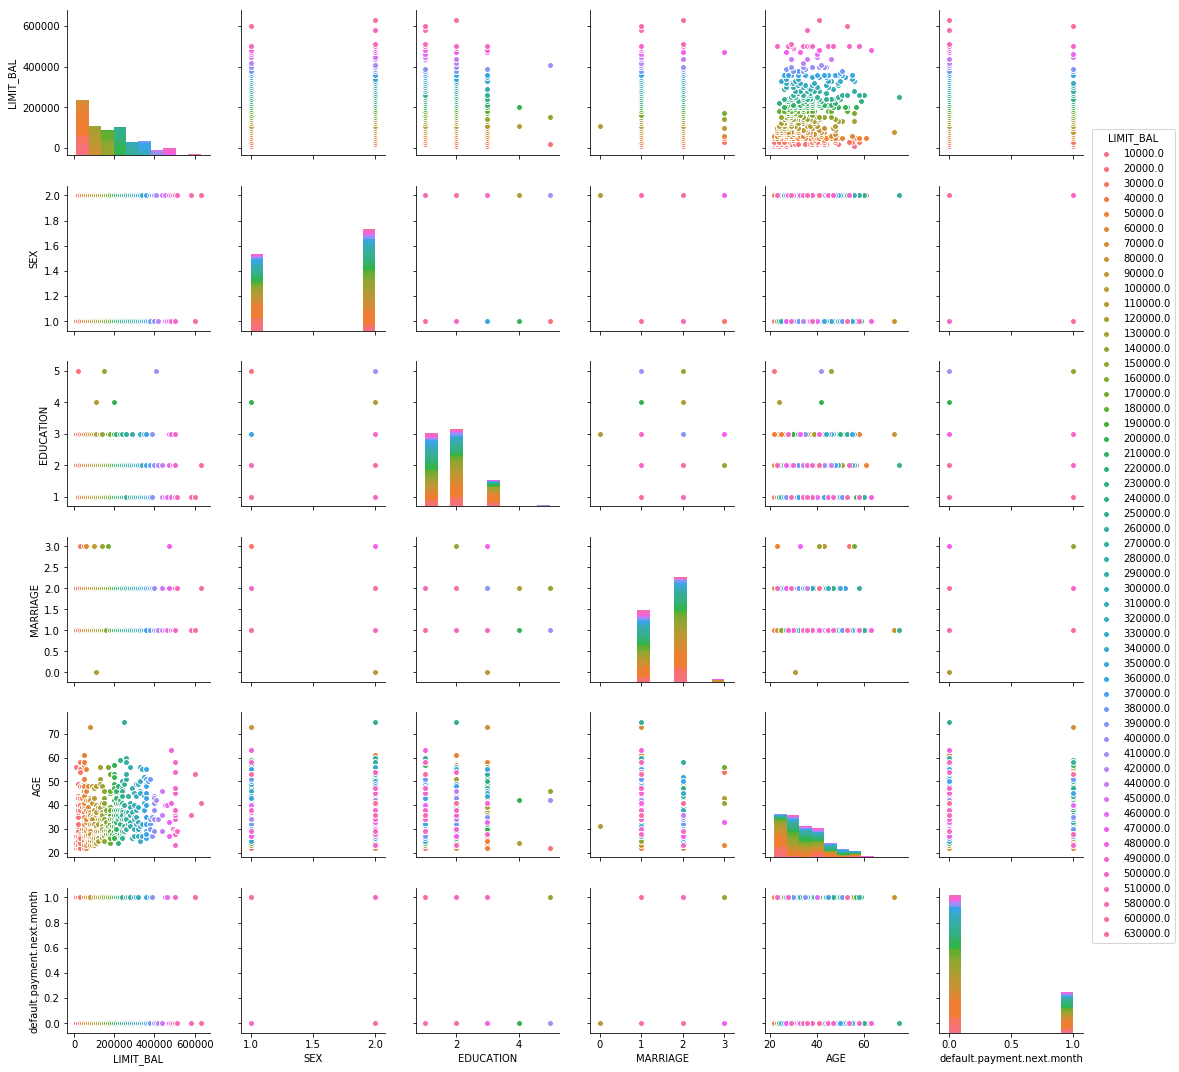

In [16]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)

sns.pairplot(df.loc[1:500,('LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default.payment.next.month')],
             hue='LIMIT_BAL'
            )
#DONE[??]